---
---
# **1. Imports**
---
---

In [12]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tabulate

---
---
# **2. Configuration**
---
---

In [ ]:
# Config
ARTIFACT_DIR = "artifacts_regression"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# Models
models = {
    "Linear Regression Tuned": joblib.load("../models/regression/best_lr_pipeline.pkl"),
    "Random Forest Tuned": joblib.load("../models/regression/best_rf_pipeline.pkl"),
    "XGBoost Tuned": joblib.load("../models/regression/best_xgb_pipeline.pkl")
}

# Validation data
df_val = pd.read_csv("../qws1_dataset/validation_data_regression.csv")
target = "WsRF: Web Service Relevancy Function (%)"
X_val = df_val.drop(columns=[target])
y_val = df_val[target]

---
---
# **3. Plotting**
---
---

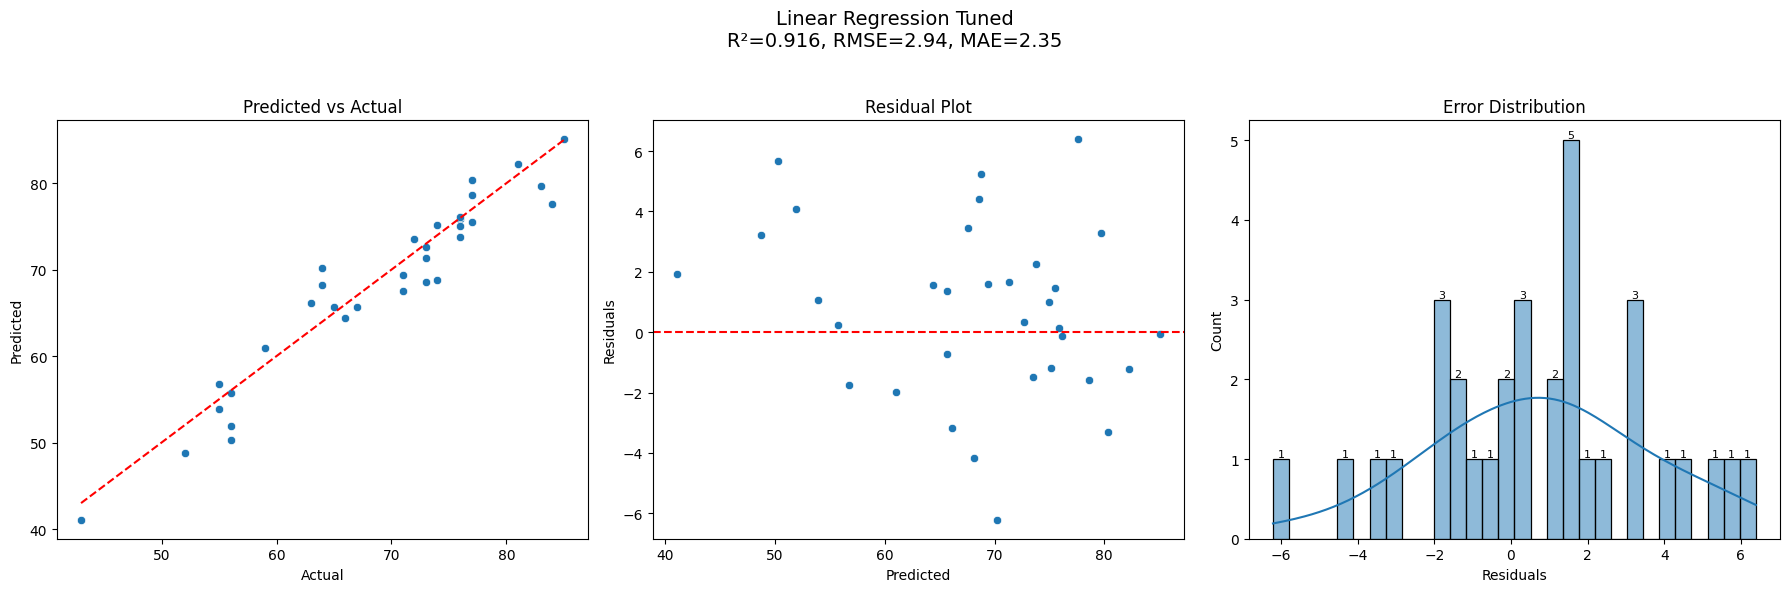

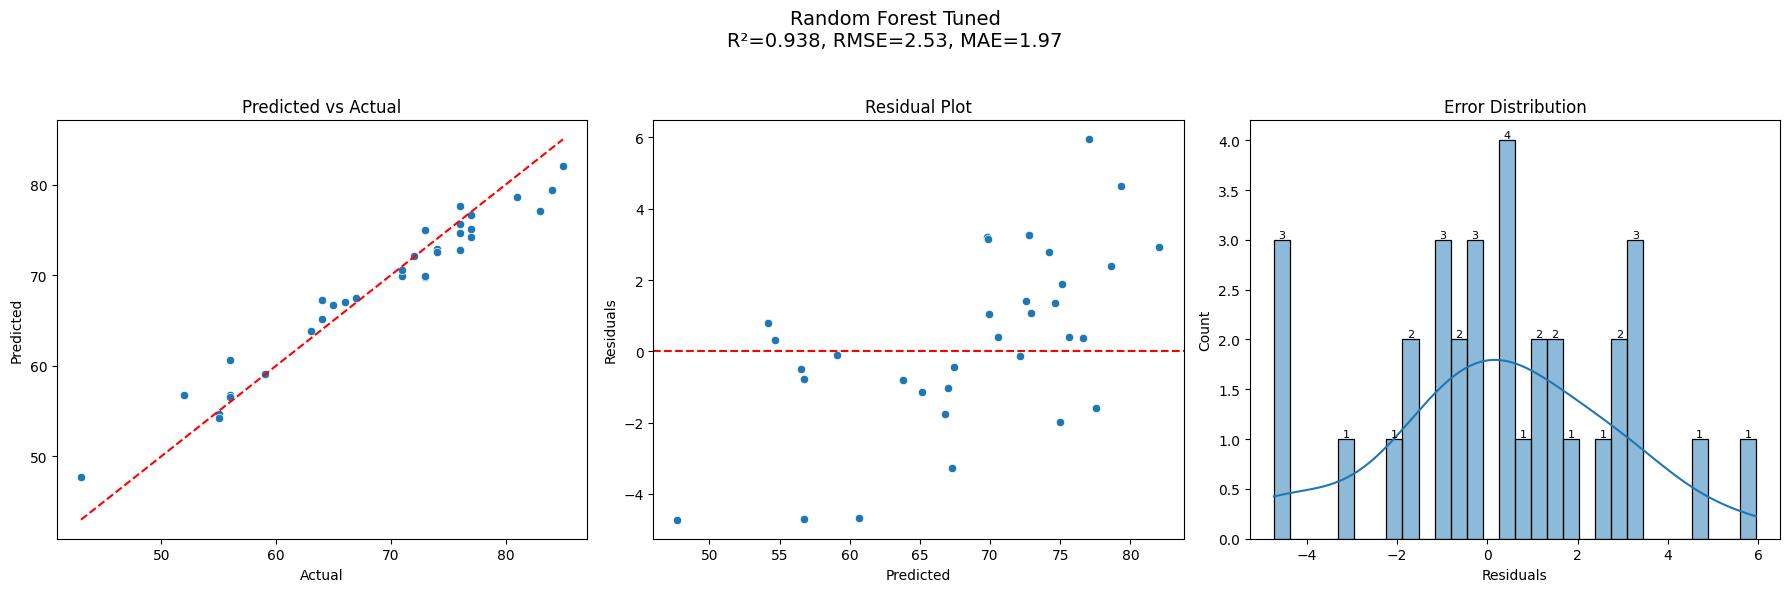

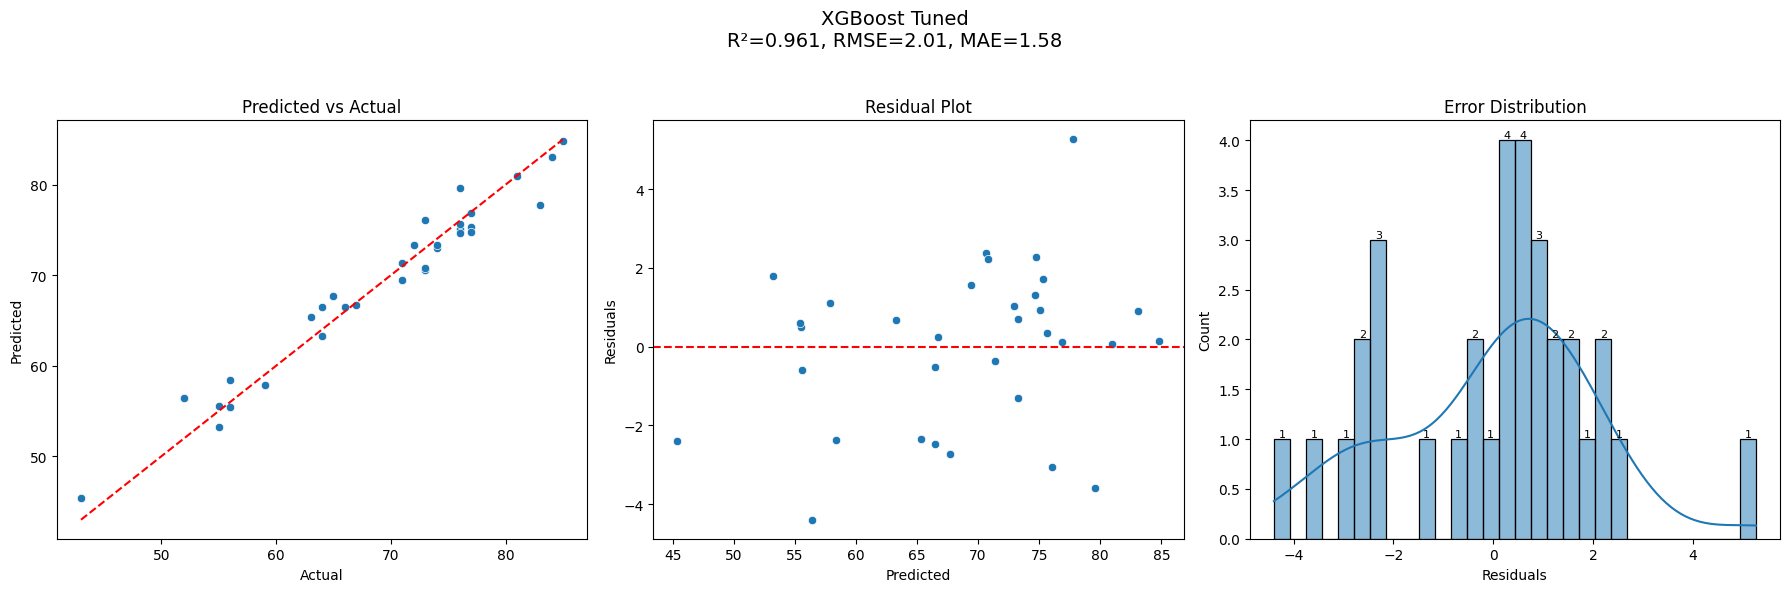

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_val)
    residuals = y_val - y_pred

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Predicted vs Actual
    sns.scatterplot(x=y_val, y=y_pred, ax=axes[0])
    axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
    axes[0].set_title("Predicted vs Actual")
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predicted")

    # Residual Plot
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[1])
    axes[1].axhline(0, color='red', linestyle='--')
    axes[1].set_title("Residual Plot")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Residuals")

    # Error Distribution
    hist = sns.histplot(residuals, bins=30, kde=True, ax=axes[2])
    axes[2].set_title("Error Distribution")
    axes[2].set_xlabel("Residuals")

    for patch in hist.patches:
        height = patch.get_height()
        if height > 0:
            axes[2].text(
                patch.get_x() + patch.get_width() / 2,
                height,
                f"{int(height)}",
                ha="center", va="bottom", fontsize=8, color="black"
            )

    fig.suptitle(f"{name}\nR²={r2:.3f}, RMSE={rmse:.2f}, MAE={mae:.2f}", fontsize=14)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f"{ARTIFACT_DIR}/{name}_combined_plots.png")
    plt.show()


1. Linear Regression Tuned: 
    - Predicted vs Actual plot
        - Points are close to the diagonal red line, indicating good alignment between predictions and actual values.
        - $R^2$ = 0.916 -> The model explains 91.6% of variance.
        - Slight spread at higher values suggests minor under/over-prediction at extremes.
    - Residual Plot
        - Residuals are scattered around zero without a clear pattern, no strong heteroscedasticity.
        - However, some residuals reach ±6, indicating occasional large errors.
    - Error Distribution plot
        - Histogram is roughly centered around zero, but slightly skewed to the positive side.
        - Most residuals fall between -4 and +4, with a few outliers.
        - Shape is close to normal.

2. Random Forest Tuned:
    - Predicted vs Actual plot
        - Points are tighter around the diagonal compared to Linear Regression.
        - $R^2$ = 0.938, RMSE and MAE are lower -> better performance than Linear Regression.
        - Slight clustering near higher actual values, but overall strong fit.
    - Residual Plot
        - Residuals are more evenly distributed than Linear Regression, but some negative residuals at lower predicted values.
        - No obvious trend, which is good.
    - Error Distribution plot 
        - Centered near zero, slightly narrower spread than Linear Regression.
        - Fewer extreme residuals -> Random Forest handles variability better.

3. XGBoost Tuned:
    - Predicted vs Actual plot
        - Points almost perfectly align with the diagonal.
        - $R^2$ = 0.961, RMSE = 2.01, MAE = 1.58 -> best performance among all models.
        - Very tight clustering, minimal deviation.
    - Residual Plot
        - Residuals are small and evenly scattered around zero.
        - No visible pattern.
    - Error Distribution plot:
        - Very narrow spread, most residuals between -3 and +3.
        - Almost symmetric around zero → strong indication of unbiased predictions.

---
---
# **4. Drift Checks**
---
---

---
---
# **5. Summary**
---
---